In [2]:
#Daniel Hedji, V00887395
#PHYS 321A, A01
#Numerical Solutions to Assignment 1
from scipy import integrate
import math as ma
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#a
#constants given
mass = 70
g = 9.81
x = 32000
#integrating rhs of the ODE (vdv = -gdx)
y = integrate.quad(lambda v: -g, x, 0)
#solving for v
v = ma.sqrt(2*y[0])
#solving for t in a kinematics equation
t = 2 * x / v
#prints total time to nearest second
print("The total amount of time it took for the sky-diver to reach the \
ground was:", round(t), "seconds")

The total amount of time it took for the sky-diver to reach the ground was: 81 seconds


In [4]:
#b
#constants/initialization
c2 = 0.5
ti = 1000
tf = 1000000
t = np.linspace(0,ti,tf)
y0 = [x,0]
#defining a function to represent the differential equation
def dy_dt(y, t):
    y1, y2 = y
    dydt = [y2, -g - c2*y2*abs(y2)/mass]
    return dydt
#function used to solve the differential equation
sol = integrate.odeint(dy_dt, y0, t)
#counts the number of occurances where the position was above ground (>= 0)
count = 0
for i in sol: 
    #i[0] is the position that was found from odeint
    if i[0] >= 0:
        count += 1
    #stops if less than 0
    else: 
        break
#summing up all of the individual times to get a total time
final_t = count*ti/tf
#prints total time to nearest second
print("The total amount of time it took for the sky-diver to reach the \
ground was:", round(final_t), "seconds")

The total amount of time it took for the sky-diver to reach the ground was: 866 seconds


In [14]:
#c
#defining a function to represent the rhs of the differential equation
#a represents the acceleration, v represents the velocity
#returns a list of the velocity and acceleration, y is a list using the initial conditions
#time is a list/array representing time intervals
def rhs(y,t):
    v = y[1]
    a = - (9.8 / ((1 + y[0]/6370e3) ** 2)) - (1/(2*70)  *  
        np.exp((-y[0]/8e3))* y[1] * abs(y[1]))
    return [v,a]
#constants
t0 = 1000
tf = 100000
#time array with 10k time intervals
t1 = np.linspace(0,t0,tf)
#solves the right-hand-side of the differential equation
ysol = integrate.odeint(rhs, y0, t1)
#counts the number of time intervals where the position was above 0m
count = 0
for i in ysol:
    #checks if position > 0
    if i[0] > 0:
        count += 1
    #stops otherwise
    else:
        break
#sums up the individual time intervals to acquire the total time taken
tot_t = count * t0 / tf
#prints total time to nearest second
print("The total amount of time it took for the sky-diver to reach the  \
ground was:", round(tot_t), "seconds")

The total amount of time it took for the sky-diver to reach the  ground was: 381 seconds


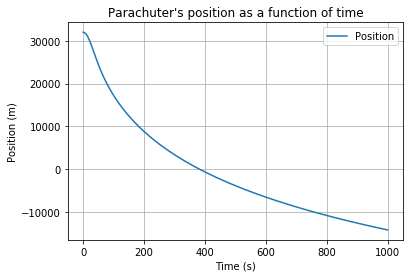

In [7]:
#d
#plots graph
plt.plot(t1,ysol[:, 0], label = "Position")
#functions to make the graph look better
plt.grid()
plt.ylabel("Position (m)")
plt.xlabel("Time (s)")
plt.title("Parachuter's position as a function of time")
plt.legend()

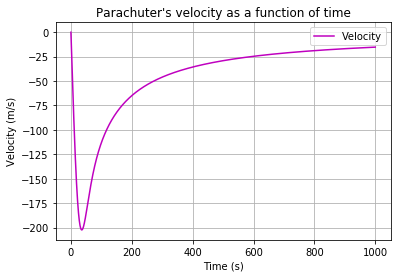

In [8]:
#plots graph
plt.plot(t1,ysol[:, 1], label = "Velocity", color = "m")
#functions to make graph look better
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Parachuter's velocity as a function of time")
plt.legend()

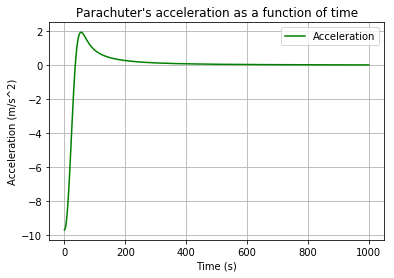

In [9]:
#since odeint only returned solutions to the differential equation
#the accelerations were put into a list
accel = []
for i in ysol:
    accel.append(rhs(i,t1)[1])
#plots the accelerations found from above against time
plt.plot(t1, accel, label = "Acceleration", color = 'g')
#functions to make the graph look better
plt.grid()
plt.ylabel("Acceleration (m/s^2)")
plt.xlabel("Time (s)")
plt.title("Parachuter's acceleration as a function of time")
plt.legend()

The reason that the parachuter's acceleration becomes positive after a while is due to him reaching terminal velocity. Due to air resistance found in the problem, his acceleration is limited to a certain range, as velocity's magnitude cannot be larger than the terminal velocity's magnitude. When the parachuter's acceleration becomes positive is when the resistance from the air overcomes the force of gravity that the parachuter experiences, this causes him to slow down to ensure his velocity doesn't exceed the terminal velocity, which in turn, causes his acceleration to become temporarily positive.